In [5]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import pyvis

import matplotlib.pyplot as plt

In [7]:
# English language model for spacy:
# Run on terminal:
# pip install -U pip setuptools wheel
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [9]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('books') if '.pdf' in b.name]

In [19]:
all_books

[<DirEntry '0 - Hunger Games.pdf'>,
 <DirEntry '1 - Catching Fire.pdf'>,
 <DirEntry '2 - Mocking Jay.pdf'>]

In [28]:
import pdfplumber
book = all_books[0]

# Specify the starting page
start_page = 3 # hunger gaemes, catching fire
# start_page =  12 #mockinjay

# Open the PDF file
with pdfplumber.open(book.path) as pdf:
    # Extract the text content starting from the specified page
    book_text = ""
    for page in pdf.pages[start_page - 1:]:  # Adjust the page index to start from 0
        book_text += page.extract_text()
# Perform NER on the text content
book_doc = NER(book_text)

In [29]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load Characters

In [30]:
# Read characters
character_df = pd.read_csv("characters.csv")

In [31]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [32]:
pd.set_option('display.max_rows', None)
character_df

,book,character,character_firstname
0,Category:Catching Fire characters,Haymitch Abernathy,Haymitch
1,Category:Catching Fire characters,Atala,Atala
2,Category:Catching Fire characters,Beetee Latier,Beetee
3,Category:Catching Fire characters,Blight,Blight
4,Category:Catching Fire characters,Bonnie,Bonnie
5,Category:Catching Fire characters,Bristel,Bristel
6,Category:Catching Fire characters,Brutus,Brutus
7,Category:Catching Fire characters,Buttercup,Buttercup
8,Category:Catching Fire characters,Cashmere,Cashmere
9,Category:Catching Fire characters,Cecelia,Cecelia


## Get named entity list per sentence


In [33]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [41]:

sent_entity_df.head(50)

,sentence,entities,character_entities
0,"(PART, I, \n, "", THE, TRIBUTES, "", \n, 3When, ...",[],[]
1,"(My, fin-, \n, gers, stretch, out, ,, seeking,...",[Prim],[]
2,"(She, must, have, had, bad, \n, dreams, and, c...",[],[]
3,"(Of, course, ,, she, did, ., \n)",[],[]
4,"(This, is, the, day, of, the, reaping, ., \n)",[the day],[]
5,"(I, prop, myself, up, on, one, elbow, .)",[one],[]
6,"(There, ’s, enough, light, in, the, \n, bedroo...",[],[]
7,"(My, little, sister, ,, Prim, ,, curled, up, o...",[Prim],[]
8,"(In, sleep, ,, my, mother, looks, younger, ,, ...",[],[]
9,"(Prim, ’s, face, is, as, fresh, as, a, raindro...",[Prim],[]


In [37]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [39]:
filter_entity(["Katniss", "Camila", "2"], character_df)

['Katniss']

In [40]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
14,"(Prim, named, him, Buttercup, ,, insisting, th...",[Buttercup],[Buttercup]
24,"(Sometimes, ,, when, I, clean, a, kill, ,, I, ...",[Buttercup],[Buttercup]
86,"(Gale, says, I, never, smile, except, in, the,...",[Gale],[Gale]
87,"(7“Hey, ,, Catnip, ,, ”, says, Gale, .)","[Catnip, Gale]",[Gale]
88,"(My, real, name, is, Katniss, ,, but, when, \n...","[Katniss, first]",[Katniss]
101,"(Think, the, old, man, was, feeling, sentiment...","[this morning, Gale]",[Gale]
110,"(Suddenly, he, falls, into, a, Capitol, accent...","[Capitol, Effie Trinket]",[Effie Trinket]
121,"(I, watch, as, Gale, pulls, out, his, knife, a...",[Gale],[Gale]
136,"(Gale, spreads, the, bread, slices, with, the,...",[Gale],[Gale]
141,"(Everything, would, be, perfect, if, this, rea...","[Gale, tonight]",[Gale]


In [42]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\camil\AppData\Local\Temp\ipykernel_19388\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [43]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
14,"(Prim, named, him, Buttercup, ,, insisting, th...",[Buttercup],[Buttercup]
24,"(Sometimes, ,, when, I, clean, a, kill, ,, I, ...",[Buttercup],[Buttercup]
86,"(Gale, says, I, never, smile, except, in, the,...",[Gale],[Gale]
87,"(7“Hey, ,, Catnip, ,, ”, says, Gale, .)","[Catnip, Gale]",[Gale]
88,"(My, real, name, is, Katniss, ,, but, when, \n...","[Katniss, first]",[Katniss]
...,...,...,...
8709,"(“, But, you, knew, what, he, wanted, you, to,...",[Peeta],[Peeta]
8711,"(“, Katniss, ?, ”)",[Katniss],[Katniss]
8713,"(“, It, was, all, for, the, Games, ,, ”, Peeta...",[Peeta],[Peeta]
8723,"(By, the, time, I, ’ve, climbed, aboard, ,, Pe...",[Peeta],[Peeta]


## Create relationships

In [44]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [45]:
relationship_df = pd.DataFrame(relationships)

In [46]:
pd.set_option('display.max_rows', 10)
relationship_df

,source,target
0,Gale,Katniss
1,Gale,Katniss
2,Gale,Katniss
3,Gale,Katniss
4,Gale,Katniss
...,...,...
2427,Katniss,Peeta
2428,Peeta,Katniss
2429,Katniss,Peeta
2430,Katniss,Peeta


In [47]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Gale,Katniss
1,Gale,Katniss
2,Gale,Katniss
3,Gale,Katniss
4,Gale,Katniss
...,...,...
2427,Katniss,Peeta
2428,Katniss,Peeta
2429,Katniss,Peeta
2430,Katniss,Peeta


In [48]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [49]:
relationship_df.head(10)

,source,target,value
0,Gale,Katniss,8
1,Gale,Greasy,12
2,Greasy,Madge,3
3,Gale,Madge,44
4,Katniss,Madge,15
5,Effie,Madge,6
6,Effie,Haymitch,184
7,Gale,Haymitch,18
8,Effie,Gale,5
9,Effie,Katniss,19


## Graph analysis and visualization

In [50]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Graph visualization - Networkx

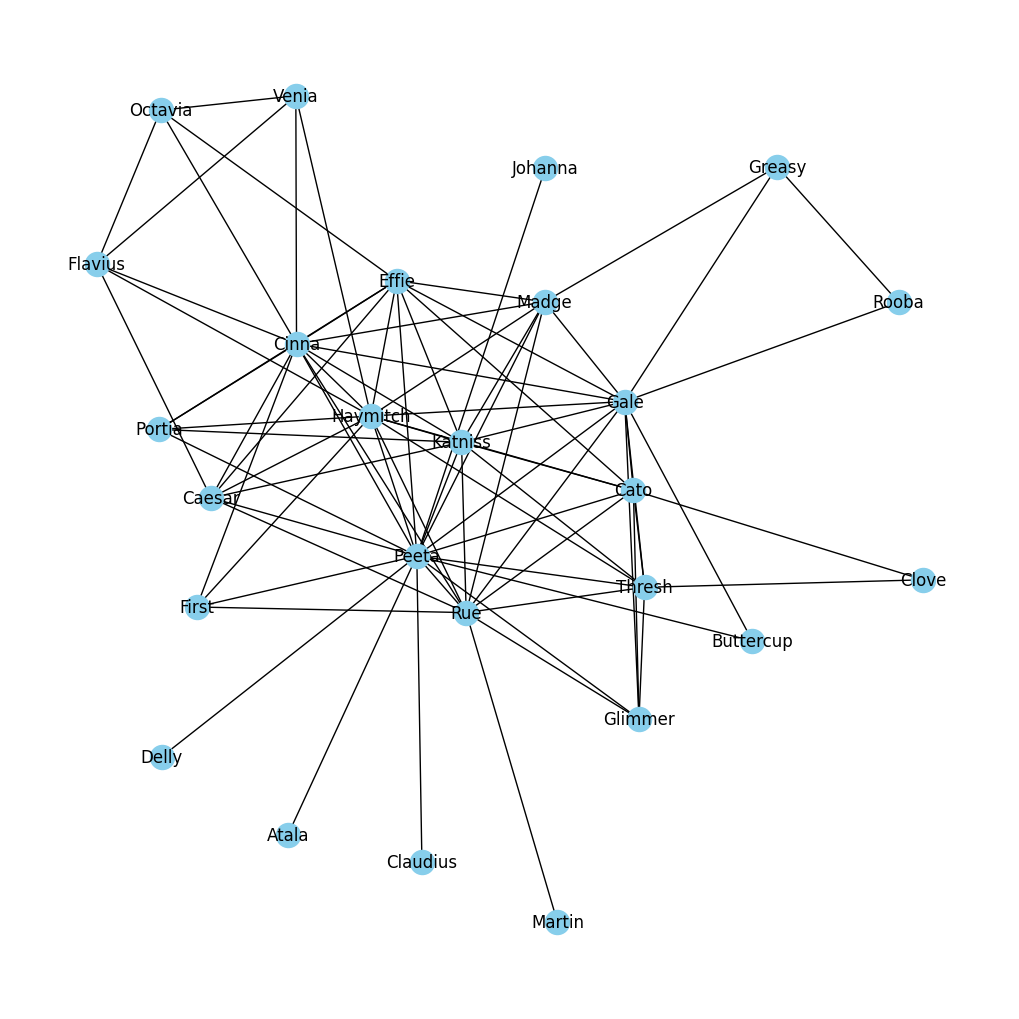

In [52]:
import scipy
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Graph visualization - Pyvis

In [53]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("hunger-games-network.html")

hunger-games-network.html


### The most important characters in The Witcher

In [54]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Gale': 0.52,
 'Katniss': 0.44,
 'Greasy': 0.12,
 'Madge': 0.32,
 'Effie': 0.4,
 'Haymitch': 0.56,
 'Peeta': 0.72,
 'Johanna': 0.04,
 'Buttercup': 0.08,
 'Venia': 0.16,
 'Flavius': 0.2,
 'Octavia': 0.16,
 'Cinna': 0.52,
 'Portia': 0.2,
 'Delly': 0.04,
 'First': 0.16,
 'Atala': 0.04,
 'Rue': 0.48,
 'Caesar': 0.28,
 'Thresh': 0.32,
 'Claudius': 0.04,
 'Cato': 0.36,
 'Glimmer': 0.2,
 'Martin': 0.04,
 'Rooba': 0.08,
 'Clove': 0.08}

<Axes: >

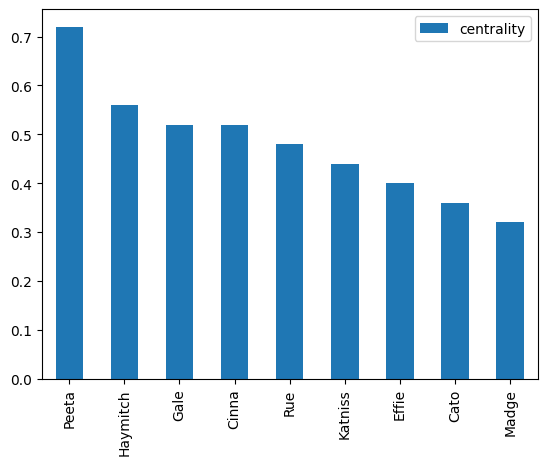

In [55]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

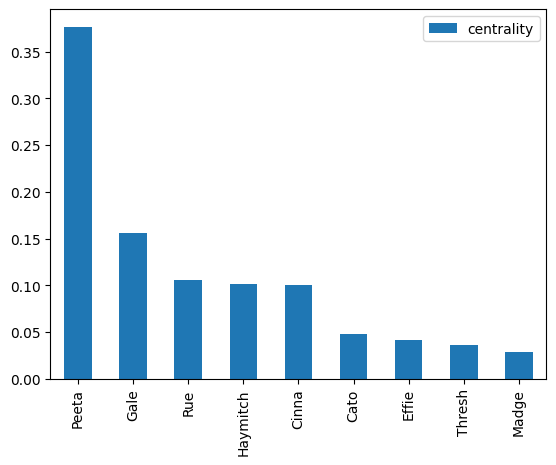

In [56]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

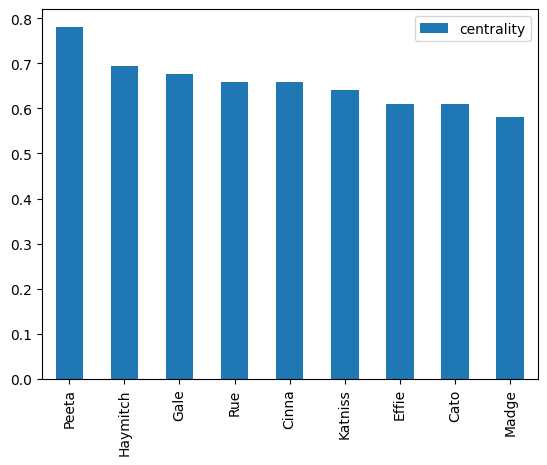

In [57]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [58]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

## Community detection

In [61]:
# import community as community_louvain
# pip install python-louvain
import community.community_louvain as community_louvain

In [62]:
communities = community_louvain.best_partition(G)

In [63]:
communities

{'Gale': 2,
 'Katniss': 0,
 'Greasy': 2,
 'Madge': 2,
 'Effie': 0,
 'Haymitch': 0,
 'Peeta': 1,
 'Johanna': 1,
 'Buttercup': 1,
 'Venia': 0,
 'Flavius': 0,
 'Octavia': 0,
 'Cinna': 0,
 'Portia': 0,
 'Delly': 1,
 'First': 1,
 'Atala': 1,
 'Rue': 3,
 'Caesar': 0,
 'Thresh': 3,
 'Claudius': 1,
 'Cato': 3,
 'Glimmer': 3,
 'Martin': 3,
 'Rooba': 2,
 'Clove': 3}

In [64]:
nx.set_node_attributes(G, communities, 'group')

In [66]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("hunger-games-communities.html")

hunger-games-communities.html


## Evolution of characters' importance

In [72]:
# importing module
import sys
 
# appending a path
sys.path.append('lib2/utils/')
 
# importing required module
from functions import *

In [68]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('books') if '.pdf' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [73]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                          
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 440: character maps to <undefined>